In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [3]:
# READ CSV
cities_path = os.path.join("..","Resources","cities_housing_new.csv")
housing_df = pd.read_csv(cities_path)
housing_df.head()

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,$220K,-0.7%,-5.0%,183,27.1%,-9.0%
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,$185K,7.5%,9.4%,154,13.2%,13.2%
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,$139K,-6.1%,-9.8%,130,-11.0%,62.5%
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,$84K,23.0%,222.4%,43,-27.1%,34.4%
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,$120K,0.2%,9.0%,110,-22.0%,20.9%


In [4]:
#Removing 2019 & 2020 Data
housing_df = housing_df[(housing_df["Month of Period End"].str.contains("2012|2013|2014|2015|2016|2017|2018"))]
housing_df

,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Inventory Yoy,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,-27.9%,88,9.0,10.0,$220K,-0.7%,-5.0%,183,27.1%,-9.0%
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,-27.8%,105,-2.0,17.0,$185K,7.5%,9.4%,154,13.2%,13.2%
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,19.3%,77,15.0,42.0,$139K,-6.1%,-9.8%,130,-11.0%,62.5%
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,21.8%,61,-9.0,56.0,$84K,23.0%,222.4%,43,-27.1%,34.4%
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,-15.0%,69,12.0,5.0,$120K,0.2%,9.0%,110,-22.0%,20.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,"Missouri City, TX",February 2017,All Residential,Place/City,False,TX,0.969162,0.0%,0.0%,102,...,19.1%,67,25.0,22.0,$256K,7.7%,6.0%,155,3.3%,0.0%
1034,"Houston, TX",April 2017,All Residential,Place/City,False,TX,0.973047,0.4%,0.1%,2631,...,5.2%,30,-7.0,2.0,$214K,1.9%,4.4%,4078,-7.6%,11.6%
1035,"League City, TX",March 2018,All Residential,Place/City,False,TX,0.986064,1.1%,0.2%,171,...,-13.0%,31,-28.0,-6.0,$275K,3.1%,7.8%,206,30.4%,-10.4%
1036,"Pasadena, TX",November 2018,All Residential,Place/City,False,TX,0.968382,-0.1%,-0.2%,61,...,42.3%,19,1.0,-13.0,$174K,12.7%,2.4%,85,-14.1%,11.8%


In [5]:
#Change prices from strings to integers
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.lower().replace('k','',regex=True)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].str.replace('$','',regex=True)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"].astype(float)
housing_df["Median Sale Price"] = housing_df["Median Sale Price"] 


# ADDING MONTH SUPPLY
housing_df["Month Supply"] = round(((housing_df["Inventory"] + housing_df["New Listings"]) / housing_df["Homes Sold"]),4)
housing_df



,Region,Month of Period End,Property Type,Region Type,Seasonally Adjusted,State Code,Avg Sale To List,Avg Sale To List Mom,Avg Sale To List Yoy,Homes Sold,...,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,Median Sale Price Mom,Median Sale Price Yoy,New Listings,New Listings Mom,New Listings Yoy,Month Supply
0,"Sugar Land, TX",February 2012,All Residential,Place/City,False,TX,0.952058,-0.5%,0.6%,113,...,88,9.0,10.0,220.0,-0.7%,-5.0%,183,27.1%,-9.0%,6.6018
1,"Missouri City, TX",February 2012,All Residential,Place/City,False,TX,0.966081,1.6%,1.7%,88,...,105,-2.0,17.0,185.0,7.5%,9.4%,154,13.2%,13.2%,7.3636
2,"Galveston, TX",May 2012,All Residential,Place/City,False,TX,0.936675,-1.1%,-6.3%,97,...,77,15.0,42.0,139.0,-6.1%,-9.8%,130,-11.0%,62.5%,7.7629
3,"Texas City, TX",May 2012,All Residential,Place/City,False,TX,0.949948,2.0%,-6.3%,30,...,61,-9.0,56.0,84.0,23.0%,222.4%,43,-27.1%,34.4%,8.7000
4,"Baytown, TX",July 2012,All Residential,Place/City,False,TX,0.981432,1.4%,0.8%,84,...,69,12.0,5.0,120.0,0.2%,9.0%,110,-22.0%,20.9%,6.5714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,"Missouri City, TX",February 2017,All Residential,Place/City,False,TX,0.969162,0.0%,0.0%,102,...,67,25.0,22.0,256.0,7.7%,6.0%,155,3.3%,0.0%,5.7353
1034,"Houston, TX",April 2017,All Residential,Place/City,False,TX,0.973047,0.4%,0.1%,2631,...,30,-7.0,2.0,214.0,1.9%,4.4%,4078,-7.6%,11.6%,5.1589
1035,"League City, TX",March 2018,All Residential,Place/City,False,TX,0.986064,1.1%,0.2%,171,...,31,-28.0,-6.0,275.0,3.1%,7.8%,206,30.4%,-10.4%,3.0877
1036,"Pasadena, TX",November 2018,All Residential,Place/City,False,TX,0.968382,-0.1%,-0.2%,61,...,19,1.0,-13.0,174.0,12.7%,2.4%,85,-14.1%,11.8%,4.8689


In [6]:
housing_df.describe()

,Avg Sale To List,Homes Sold,Inventory,Median Dom,Median Dom Mom,Median Dom Yoy,Median Sale Price,New Listings,Month Supply
count,840.000000,840.000000,840.000000,840.000000,838.000000,830.000000,840.000000,840.000000,840.000000
mean,0.969350,339.516667,1134.470238,43.901190,-0.408115,-8.659036,189.654762,440.201190,4.966146
std,0.013843,734.925376,2452.643818,24.708957,16.772867,37.428283,61.380405,968.292558,2.154259
min,0.889938,12.000000,41.000000,7.000000,-71.000000,-661.000000,55.000000,21.000000,1.690500
25%,0.963598,60.000000,183.750000,25.000000,-8.000000,-18.000000,147.750000,76.000000,3.533600
50%,0.971815,96.000000,352.000000,37.500000,1.000000,-5.000000,182.000000,121.000000,4.476500
75%,0.978537,157.250000,558.250000,57.000000,8.000000,5.000000,232.250000,193.000000,5.865325
max,1.006847,3218.000000,10970.000000,141.000000,71.000000,99.000000,389.000000,4527.000000,19.485700


In [7]:
#Obtain Average of the median prices, also need to format time period as date time
housing_df["Month of Period End"] = pd.to_datetime(housing_df["Month of Period End"],format='%B %Y')
grouped_housing = housing_df.groupby([housing_df["Region"], housing_df["Month of Period End"].dt.year])
grouped_housing_df = grouped_housing.agg(MedianSalePrice=pd.NamedAgg(column='Median Sale Price', aggfunc='mean'))
grouped_housing_df.head(25)


MedianSalePrice
Region          Month of Period End                 
Baytown, TX     2012                      116.000000
                2013                      123.000000
                2014                      138.333333
                2015                      151.833333
                2016                      167.083333
                2017                      175.833333
                2018                      187.250000
Friendswood, TX 2012                      184.916667
                2013                      195.166667
                2014                      214.250000
                2015                      214.833333
                2016                      263.500000
                2017                      265.000000
                2018                      257.083333
Galveston, TX   2012                      152.083333
                2013                      170.000000
                2014                      178.333333
                2015                      172.166667
                2016                      194.416667
                2017                      208.166667
                2018                      222.833333
Houston, TX     2012                      150.916667
                2013                      170.166667
                2014                      183.083333
                2015                      190.416667

## Median Housing Price per City (line  graph)

In [8]:
#Look into MultiIndex
grouped_housing_df.unstack(level=0).columns

MultiIndex([('MedianSalePrice',       'Baytown, TX'),
            ('MedianSalePrice',   'Friendswood, TX'),
            ('MedianSalePrice',     'Galveston, TX'),
            ('MedianSalePrice',       'Houston, TX'),
            ('MedianSalePrice',      'La Porte, TX'),
            ('MedianSalePrice',   'League City, TX'),
            ('MedianSalePrice', 'Missouri City, TX'),
            ('MedianSalePrice',      'Pasadena, TX'),
            ('MedianSalePrice',    'Sugar Land, TX'),
            ('MedianSalePrice',    'Texas City, TX')],
           names=[None, 'Region'])

In [9]:
#DataFrame for color formatting and not lose their assigned values upon sorting
city_list = housing_df["Region"].unique().tolist()
city_list = sorted(city_list)
colors = ["royalblue", "purple", "mediumturquoise", "gold", "darkorange", "grey", "blue", "brown", "deeppink", "limegreen"]
colors_df = pd.DataFrame({"Cities": city_list, "Colors": colors })
colors_df


,Cities,Colors
0,"Baytown, TX",royalblue
1,"Friendswood, TX",purple
2,"Galveston, TX",mediumturquoise
3,"Houston, TX",gold
4,"La Porte, TX",darkorange
5,"League City, TX",grey
6,"Missouri City, TX",blue
7,"Pasadena, TX",brown
8,"Sugar Land, TX",deeppink
9,"Texas City, TX",limegreen


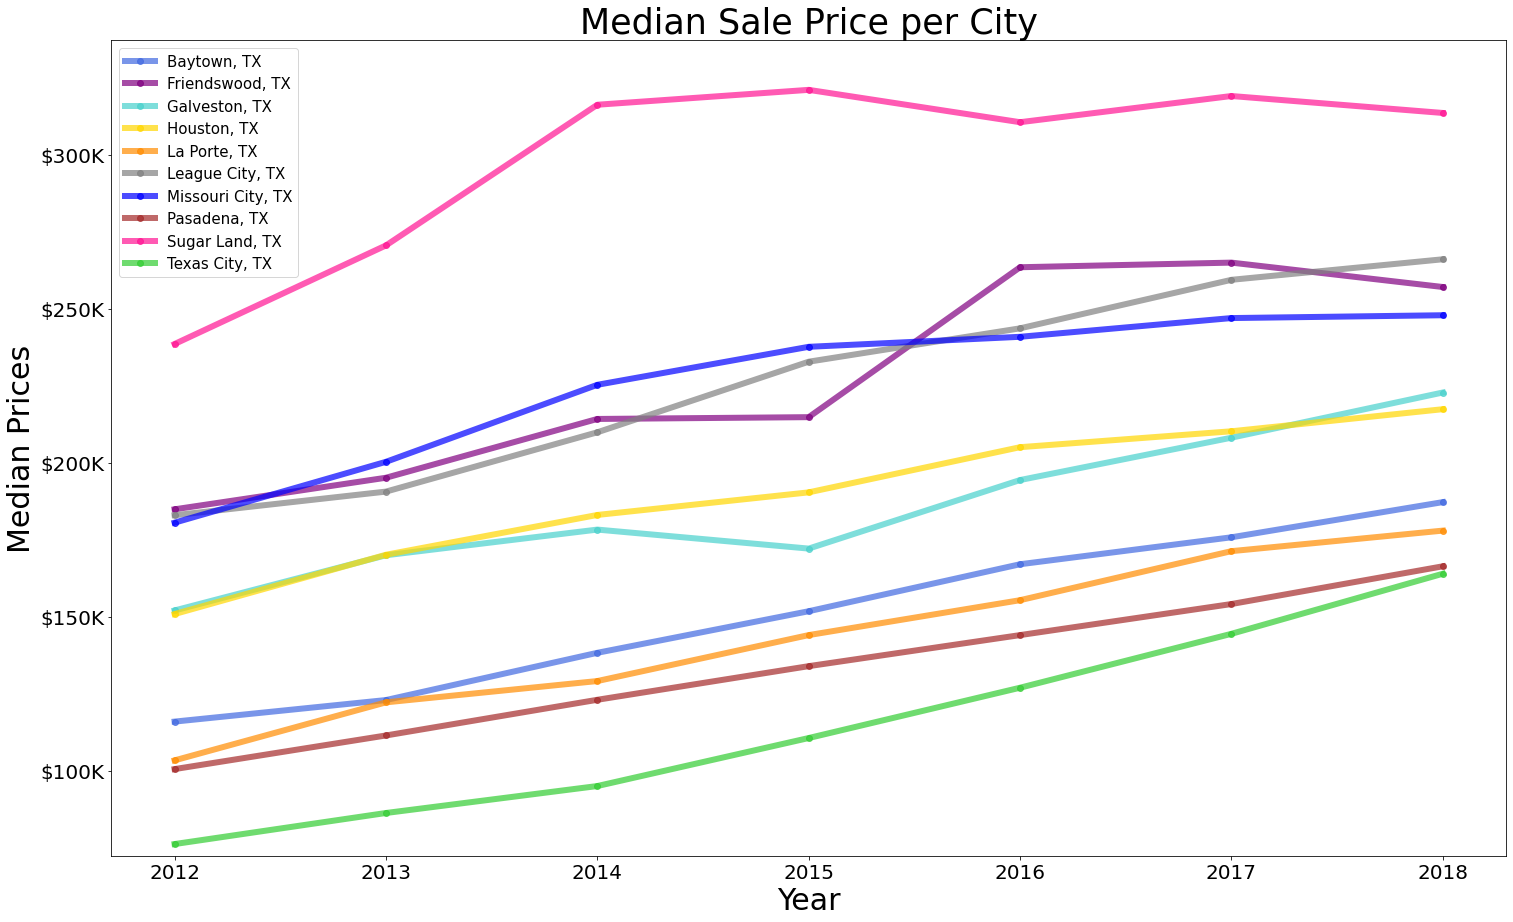

In [11]:
#PLOT MEDIAN SALE PRICE

#Y-axis for min/max limits
y_axis = grouped_housing_df["MedianSalePrice"].unique()

#Unstack multiindex
unstacked_housing = grouped_housing_df.unstack(level=0)

#Plot
fig, ax = plt.subplots(figsize=(25,15))
g = unstacked_housing.plot.line(ax=ax, legend=False, alpha = .7, linewidth = 6, marker="o", color=colors_df["Colors"])

#Format and labels for plot
g.legend(labels = [x[1] for x in unstacked_housing.columns.tolist()], loc="best", fontsize=15)
ylabels = ['${:,.0f}'.format(x) + 'K' for x in g.get_yticks()]
g.set_yticklabels(ylabels, fontsize=20)
plt.xticks(fontsize=20)
g.set_xlabel("Year", fontsize=30)
g.set_ylabel("Median Prices", fontsize = 30)
g.set_ylim(y_axis.min()*.95,y_axis.max()*1.05)
g.set_title("Median Sale Price per City", fontsize = 35)

#Save output image
output_line = os.path.join("..","Images","housingprices_linechart.png")
plt.savefig(output_line)

In [12]:
unstacked_housing

MedianSalePrice                                            \
Region                  Baytown, TX Friendswood, TX Galveston, TX Houston, TX   
Month of Period End                                                             
2012                     116.000000      184.916667    152.083333  150.916667   
2013                     123.000000      195.166667    170.000000  170.166667   
2014                     138.333333      214.250000    178.333333  183.083333   
2015                     151.833333      214.833333    172.166667  190.416667   
2016                     167.083333      263.500000    194.416667  205.083333   
2017                     175.833333      265.000000    208.166667  210.250000   
2018                     187.250000      257.083333    222.833333  217.416667   

                                                                    \
Region              La Porte, TX League City, TX Missouri City, TX   
Month of Period End                                                  
2012                  103.416667      183.000000        180.583333   
2013                  122.250000      190.666667        200.333333   
2014                  129.166667      209.916667        225.333333   
2015                  144.083333      232.833333        237.666667   
2016                  155.416667      243.666667        240.916667   
2017                  171.333333      259.416667        247.000000   
2018                  178.000000      266.083333        247.916667   

                                                                
Region              Pasadena, TX Sugar Land, TX Texas City, TX  
Month of Period End                                             
2012                  100.583333     238.583333      76.250000  
2013                  111.500000     270.583333      86.333333  
2014                  123.083333     316.250000      95.083333  
2015                  134.000000     321.083333     110.666667  
2016                  144.083333     310.583333     127.000000  
2017                  154.166667     319.083333     144.500000  
2018                  166.416667     313.583333     164.000000

## Month Supply

(Inventory + New listings) / Homes sold

In [13]:
grouped_supply_df = grouped_housing.agg(Month_Supply_Avg=pd.NamedAgg(column='Month Supply', aggfunc='mean'))
grouped_supply_df.head(25)

Month_Supply_Avg
Region          Month of Period End                  
Baytown, TX     2012                         7.232933
                2013                         5.974392
                2014                         4.458083
                2015                         4.069383
                2016                         3.815517
                2017                         3.760792
                2018                         4.086750
Friendswood, TX 2012                         5.739083
                2013                         4.441125
                2014                         3.405650
                2015                         3.333942
                2016                         3.665958
                2017                         4.173342
                2018                         4.171483
Galveston, TX   2012                        10.664492
                2013                         9.305108
                2014                         7.965800
                2015                         7.623775
                2016                         7.830900
                2017                         7.260992
                2018                         6.897292
Houston, TX     2012                         5.689533
                2013                         4.020667
                2014                         3.665067
                2015                         4.680725

In [14]:
grouped_supply_df.unstack(level=0).columns

MultiIndex([('Month_Supply_Avg',       'Baytown, TX'),
            ('Month_Supply_Avg',   'Friendswood, TX'),
            ('Month_Supply_Avg',     'Galveston, TX'),
            ('Month_Supply_Avg',       'Houston, TX'),
            ('Month_Supply_Avg',      'La Porte, TX'),
            ('Month_Supply_Avg',   'League City, TX'),
            ('Month_Supply_Avg', 'Missouri City, TX'),
            ('Month_Supply_Avg',      'Pasadena, TX'),
            ('Month_Supply_Avg',    'Sugar Land, TX'),
            ('Month_Supply_Avg',    'Texas City, TX')],
           names=[None, 'Region'])

## Bar Graph Median House Price

In [15]:
# Create list for axis in line graph

avg_price = []
for city in city_list:
    cities_median = housing_df.loc[housing_df['Region'] == city]
    avg_price.append(cities_median["Median Sale Price"].mean())

price_df = pd.DataFrame({"Cities": city_list, "Average Price": avg_price, "Colors": colors })
price_df = price_df.sort_values(by=["Average Price"], ascending=False)
price_df

,Cities,Average Price,Colors
8,"Sugar Land, TX",298.535714,deeppink
1,"Friendswood, TX",227.821429,purple
5,"League City, TX",226.511905,grey
6,"Missouri City, TX",225.678571,blue
3,"Houston, TX",189.619048,gold
2,"Galveston, TX",185.428571,mediumturquoise
0,"Baytown, TX",151.333333,royalblue
4,"La Porte, TX",143.380952,darkorange
7,"Pasadena, TX",133.404762,brown
9,"Texas City, TX",114.833333,limegreen


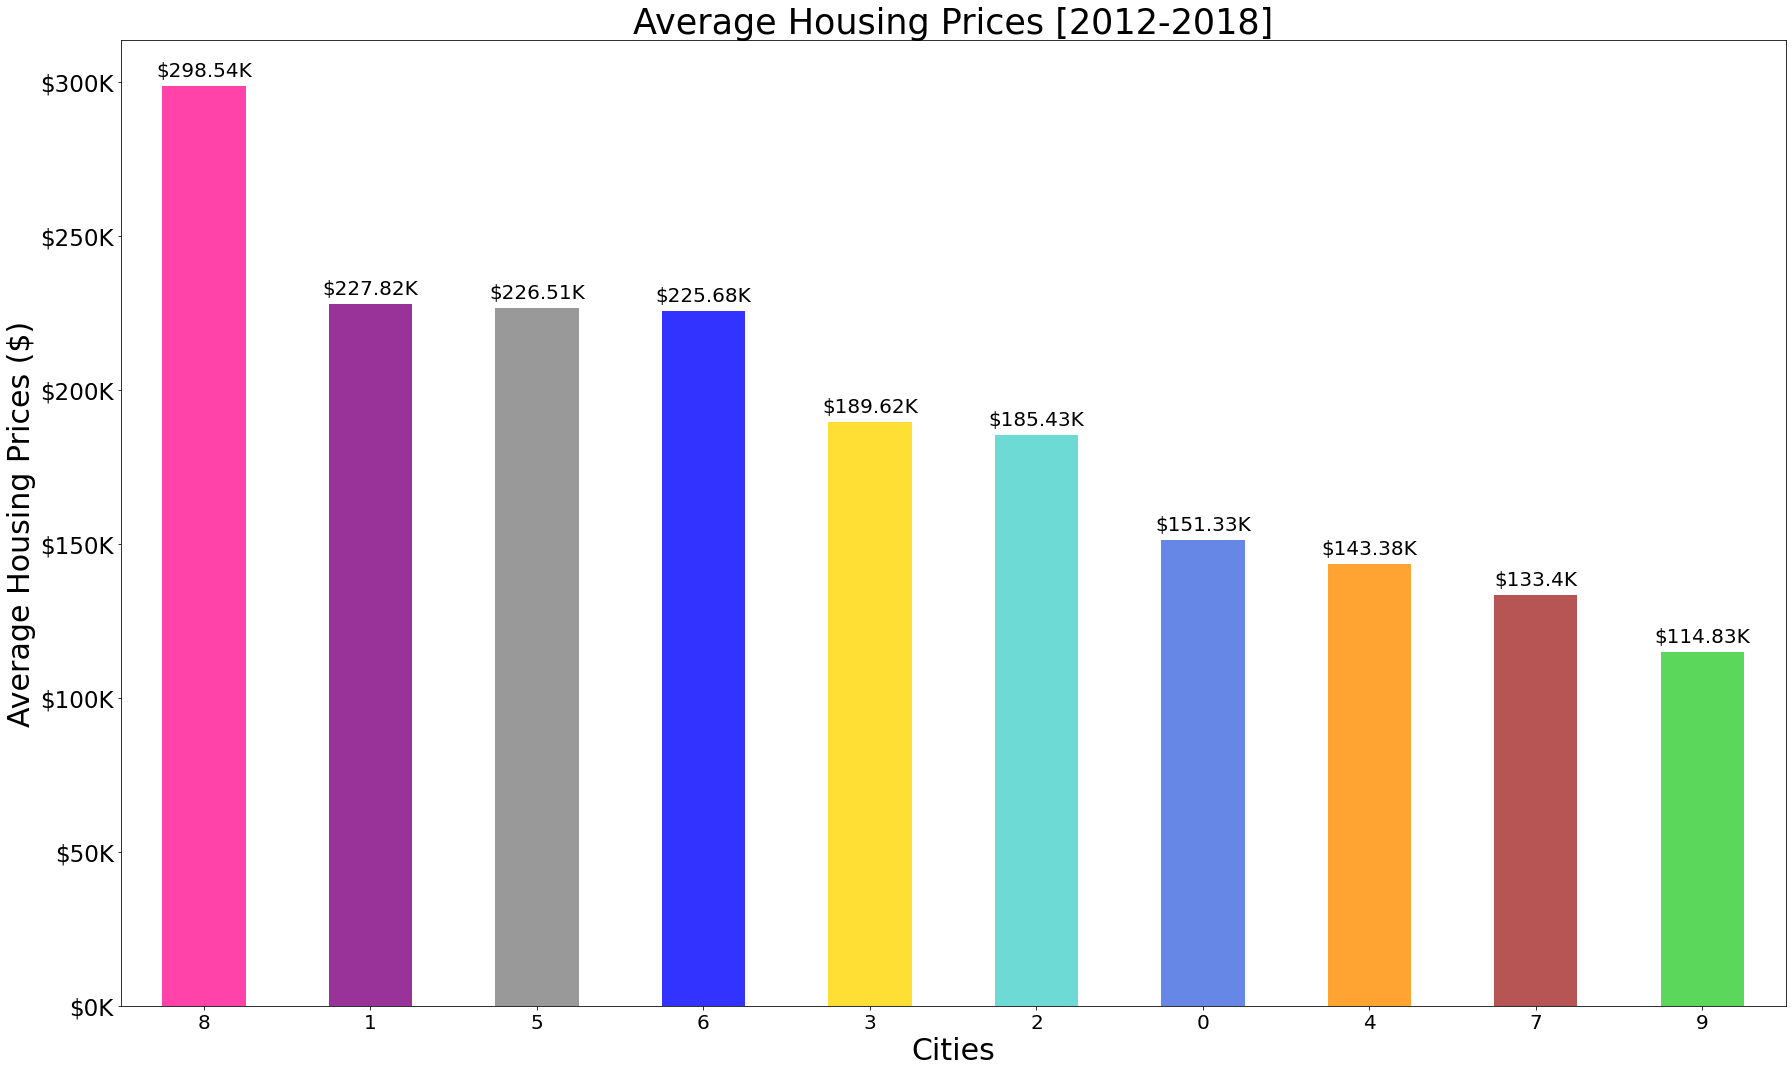

In [16]:
#Set Index to Cities - ONLY RUN ONCE
#price_df = price_df.set_index("Cities")

plt.figure(figsize=(25,15))
ax = price_df["Average Price"].plot(kind="bar", color=price_df["Colors"], alpha=.8,align="center",rot=0)
ylabels = ['${:,.0f}'.format(x) + 'K' for x in ax.get_yticks()]
ax.set_yticklabels(ylabels, fontsize=23)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The width of the bar is the data value and can used as the label
    label_text = f"${round(height,2)}K"  # f'{height:.2f}' if you have decimal values as labels
    label_x = x + width / 2
    label_y = y + height + 5
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20)

plt.xlabel("Cities",fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel("Average Housing Prices ($)",fontsize=30)
plt.title("Average Housing Prices [2012-2018]", fontsize=35)
plt.tight_layout()
output_bar = os.path.join("..","Images","housingprices_barchart.png")
plt.savefig(output_bar)

## Days on Market

In [17]:
dom = []
for city in city_list:
    cities_dom = housing_df.loc[housing_df['Region'] == city]
    dom.append(cities_dom["Median Dom"].mean())

dom_df = pd.DataFrame({"Cities": city_list, "Days on Market": dom, "Colors": colors })
dom_df = dom_df.sort_values(by=["Days on Market"], ascending=False)
dom_df

,Cities,Days on Market,Colors
2,"Galveston, TX",73.511905,mediumturquoise
9,"Texas City, TX",51.119048,limegreen
0,"Baytown, TX",47.619048,royalblue
6,"Missouri City, TX",43.321429,blue
5,"League City, TX",39.095238,grey
8,"Sugar Land, TX",38.821429,deeppink
1,"Friendswood, TX",37.452381,purple
7,"Pasadena, TX",36.309524,brown
3,"Houston, TX",36.000000,gold
4,"La Porte, TX",35.761905,darkorange


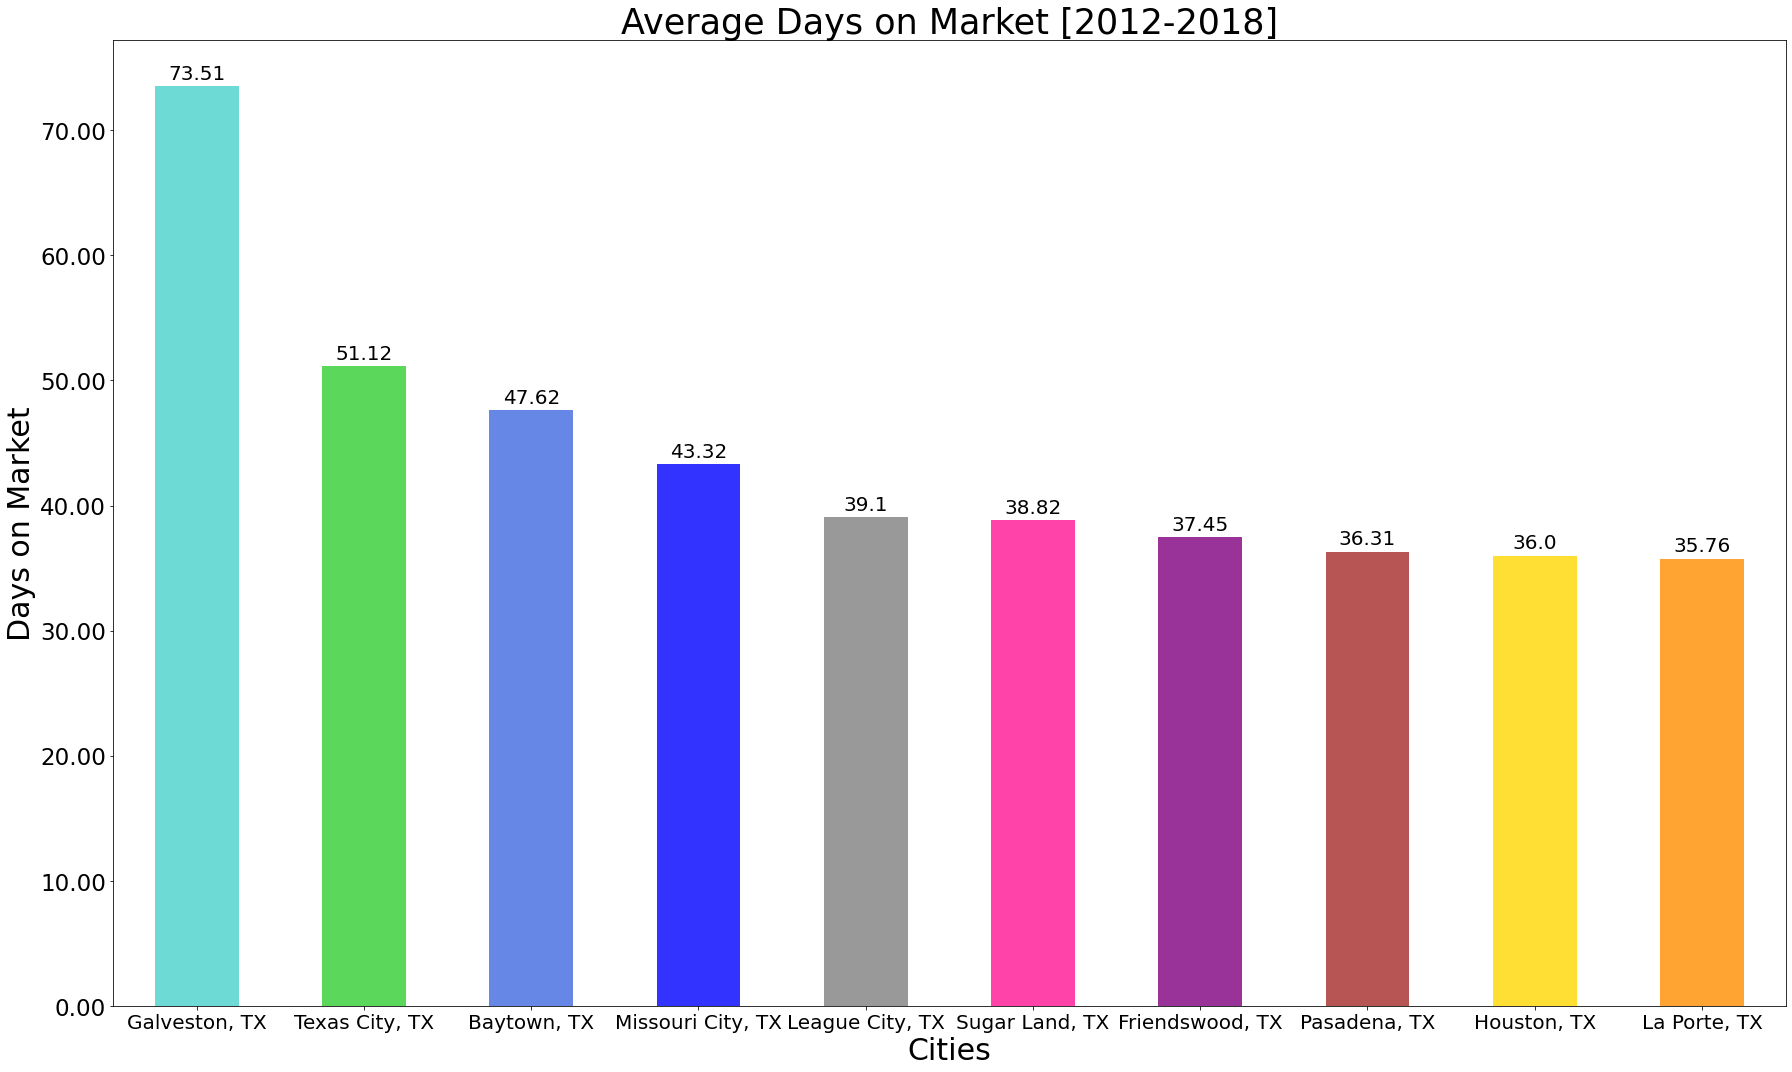

In [19]:
#Set Index to Cities - ONLY RUN ONCE
dom_df = dom_df.set_index("Cities")

plt.figure(figsize=(25,15))
ax = dom_df["Days on Market"].plot(kind="bar", color=dom_df["Colors"], alpha=.8,align="center",rot=0)
ylabels = ['{:,.2f}'.format(x) for x in ax.get_yticks()]
ax.set_yticklabels(ylabels, fontsize=23)

for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    # The width of the bar is the data value and can used as the label
    label_text = f"{round(height,2)}"  # f'{height:.2f}' if you have decimal values as labels
    label_x = x + width / 2
    label_y = y + height + 1
    ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=20)

plt.xlabel("Cities",fontsize=30)
plt.xticks(fontsize=20)
plt.ylabel("Days on Market",fontsize=30)
plt.title("Average Days on Market [2012-2018]", fontsize=35)
plt.tight_layout()
output_bardom = os.path.join("..","Images","daysonmarket_barchart.png")
plt.savefig(output_bardom)